<a href="https://colab.research.google.com/github/AkankshaKapil/AkankshaKapil/blob/main/CNN_using_large_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A028 Akanksha Kapil  Lab 7 CNN large data

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
train_path='/content/drive/MyDrive/v_data/train'
test_path='/content/drive/MyDrive/v_data/test'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D ,MaxPooling2D 
from keras.layers import Activation,Dropout,Flatten,Dense 
from keras import backend as back

In [ ]:
train_samples=400
test_samples=100

In [ ]:
width,height=224,224
if back.image_data_format()=='channels_first':
  input_sh=(3,width,height)
else:
  input_sh=(width,height,3)  



In [ ]:
#building the model
model=Sequential()
model.add(Conv2D(32,(2,2),input_shape=input_sh))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
train_data=ImageDataGenerator(rescale=1.0/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_data=ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_x=train_data.flow_from_directory(train_path,target_size=(width,height),batch_size=16,class_mode='binary')

test_x=test_data.flow_from_directory(test_path,target_size=(width,height),batch_size=16,class_mode='binary')


Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
model.fit(train_x,steps_per_epoch=train_samples//16,epochs=1,validation_data=test_x,validation_steps=test_samples//16)

25/25 [==============================] - 84s 3s/step - loss: 1.2904 - accuracy: 0.5875 - val_loss: 0.5093 - val_accuracy: 0.8333


In [ ]:
model.save('cnn_large.h5')



In [ ]:
from keras.models import load_model
model = load_model('cnn_large.h5')

In [ ]:
test_x[6][0].shape

(4, 224, 224, 3)

In [ ]:
train_x[0][0].shape

(16, 224, 224, 3)

In [ ]:
train_x.class_indices

{'cars': 0, 'planes': 1}

In [ ]:
predict_zero = model.predict(test_x[0][0])

In [ ]:
predict_zero

array([[0.2713827 ],
       [0.40098295],
       [0.11472666],
       [0.5791253 ],
       [0.10812294],
       [0.38035744],
       [0.5217509 ],
       [0.32406157],
       [0.53624475],
       [0.5160181 ],
       [0.44382188],
       [0.12501088],
       [0.28766322],
       [0.5906259 ],
       [0.52352536],
       [0.43838665]], dtype=float32)

In [ ]:
predict_zero.shape

(16, 1)

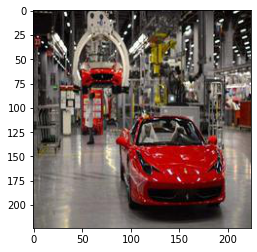

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(test_x[0][0][2])

In [ ]:
predict_first = model.predict(test_x[1][0])

In [ ]:
predict_first

array([[0.39009017],
       [0.40884107],
       [0.37032413],
       [0.5135764 ],
       [0.6038116 ],
       [0.54553205],
       [0.49720308],
       [0.5830771 ],
       [0.52524555],
       [0.19751239],
       [0.4993943 ],
       [0.5742345 ],
       [0.54606193],
       [0.53269017],
       [0.49476862],
       [0.3794197 ]], dtype=float32)

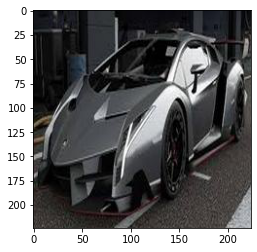

In [ ]:
plt.imshow(test_x[1][0][9])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 223, 32)      416       
                                                                 
 activation (Activation)     (None, 223, 223, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 32)      4128      
                                                                 
 activation_1 (Activation)   (None, 110, 110, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                    

In [ ]:
test_x[0][0].shape

(16, 224, 224, 3)

In [ ]:
test_x[0][1].shape

(16,)

In [ ]:
test_x[5][0].shape

(16, 224, 224, 3)

In [ ]:
test_x[4][0].shape

(16, 224, 224, 3)

In [ ]:
test_x[4][1].shape

(16,)